In [0]:
#import the necessary libraries first
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [0]:
np.random.seed(101) 
tf.set_random_seed(101) 
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
#start=0,stop=50,numbers=50
x = np.linspace(0, 50, 50) 
# Adding noise to the random linear data 

x += np.random.uniform(-4, 4, 50)
'''
line_1:

Now generate the value of Y randomly from standard normal distribution. 
Make sure the shape of X and Y are same

'''
#mean=0,varience=1 in SND and shape=50
y=np.random.normal(0,1,50)


n = len(x) # Number of data points 

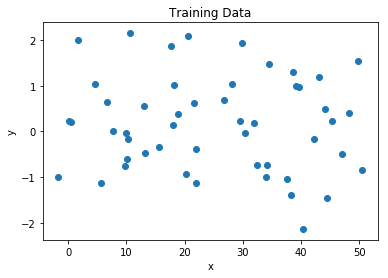

In [39]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show() 

In [0]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")
'''
line_2 & line_3 : 
Now , create two variables named learning_rate and training_epochs and set some value. 
First assign learning rate as 0.01 and training epochs as 1000


line_4:

declare the hypothesis line as 

y_pred= X*W + b

use tensorflow (tf) to add and mutiply 

line_5:

Declare the cost function as mean squared error of y_pred and Y as

         1                         2 
cost =  --- [ sum of ( y_pred - Y )   ]
         2n
         
Use tf.reduce_sum and tf.pow 

'''
learning_rate=0.01
training_epochs=1000
 
y_pred = tf.add((tf.multiply(X,W)),b)


cost= tf.divide((tf.reduce_sum((tf.pow((tf.subtract(y_pred,Y)),2)))),(2*n))


# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [41]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    sess.run(init) 
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 0.6167755 W = 0.022213683 b = -0.49482715
Epoch 100 : cost = 0.6048826 W = 0.020790085 b = -0.42521903
Epoch 150 : cost = 0.5956166 W = 0.019518534 b = -0.36304522
Epoch 200 : cost = 0.588423 W = 0.01838282 b = -0.3075131
Epoch 250 : cost = 0.58286124 W = 0.017368412 b = -0.25791278
Epoch 300 : cost = 0.5785825 W = 0.016462373 b = -0.21361098
Epoch 350 : cost = 0.5753104 W = 0.015653117 b = -0.17404151
Epoch 400 : cost = 0.5728263 W = 0.0149303125 b = -0.13869932
Epoch 450 : cost = 0.57095736 W = 0.014284713 b = -0.107132114
Epoch 500 : cost = 0.5695671 W = 0.01370808 b = -0.078936905
Epoch 550 : cost = 0.5685479 W = 0.01319304 b = -0.05375342
Epoch 600 : cost = 0.56781507 W = 0.0127330115 b = -0.03126005
Epoch 650 : cost = 0.56730235 W = 0.012322128 b = -0.011169419
Epoch 700 : cost = 0.5669574 W = 0.011955134 b = 0.006775134
Epoch 750 : cost = 0.5667394 W = 0.011627342 b = 0.02280282
Epoch 800 : cost = 0.56661665 W = 0.011334567 b = 0.03711845
Epoch 850 : cost = 0.5

In [42]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 0.5666603 Weight = 0.010444543 bias = 0.08063715 



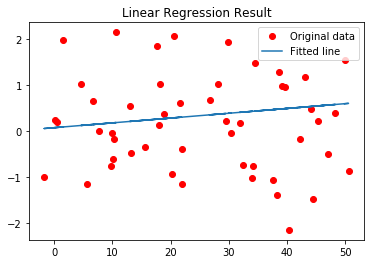

In [43]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 